# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the dataset

In [2]:
df=pd.read_csv('cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [34]:

df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [35]:
df['tweet_text'][:]

0        In other words #katandandre, your food was cra...
1        Why is #aussietv so white? #MKR #theblock #ImA...
2        @XochitlSuckkks a classy whore? Or more red ve...
3        @Jason_Gio meh. :P  thanks for the heads up, b...
4        @RudhoeEnglish This is an ISIS account pretend...
                               ...                        
47687    Black ppl aren't expected to do anything, depe...
47688    Turner did not withhold his disappointment. Tu...
47689    I swear to God. This dumb nigger bitch. I have...
47690    Yea fuck you RT @therealexel: IF YOURE A NIGGE...
47691    Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...
Name: tweet_text, Length: 47692, dtype: object

In [36]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [37]:
df.shape

(47692, 2)

In [38]:
df=df.iloc[:10000,]
df.shape

(10000, 2)

# Handle null values

In [39]:
df.duplicated().sum()

10

In [40]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [41]:
df.shape

(9990, 2)

# Data preprocessing steps

In [42]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [43]:
import nltk
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [45]:
sw=stopwords.words('English')
lm=WordNetLemmatizer()
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [46]:
data=[]
for i in df['tweet_text']:
    t=i.lower()
    t=re.sub('[^A-Za-z0-9]',' ',t)
    t=word_tokenize(t)
    t=[i for i in t if i not in sw]
    t=[lm.lemmatize(i) for i in t]
    t=" ".join(t)
    data.append(t)
print(data)

['word katandandre food crapilicious mkr', 'aussietv white mkr theblock imacelebrityau today sunrise studio10 neighbour wonderlandten etc', 'xochitlsuckkks classy whore red velvet cupcake', 'jason gio meh p thanks head concerned another angry dude twitter', 'rudhoeenglish isi account pretending kurdish account like islam lie', 'raja5aab quickieleaks yes test god good bad indifferent weird whatever prof god existence', 'itu sekolah ya bukan tempat bully ga jauh kaya neraka', 'karma hope bite kat butt nasty mkr', 'stockputout everything mostly priest', 'rebecca black drop school due bullying', 'jord dead http co usqinyw5gn', 'bully flush kd http twitvid com a2tnp', 'ughhhh mkr', 'rt kurdsnews turkish state killed 241 child last 11 year http co jlvke1epws news google eviricitoplulu uk rt eyidee', 'love best response hotcake managed film non committal meh adolescent mkr', 'yasmimcaci bferrarii parem de fazer bullying comigo uhahuah bando de preto', 'sarinhacoral victor maggi tadinhu de mim

In [47]:
print(len(data))

9990


# Transforming the words into vectors

# Count Vectorizer

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
cv=CountVectorizer(max_features=1500)
cv_res=cv.fit_transform(data).toarray()
print(cv_res)
print(len(cv.get_feature_names_out()))
print(cv.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1500
['000' '10' '100' ... 'yup' 'zaibatsunews' 'zero']


# Select x(independent feature) and y(dependent feature)

In [55]:
x=cv_res
y=df['cyberbullying_type']
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [56]:
print(x.shape)
print(y.shape)

(9990, 1500)
(9990,)


# Split into train and test data

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(6993, 1500)
(2997, 1500)
(6993,)
(2997,)


In [59]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
y_train

5861    not_cyberbullying
3687    not_cyberbullying
9940               gender
5217    not_cyberbullying
3762    not_cyberbullying
              ...        
5738    not_cyberbullying
5194    not_cyberbullying
5393    not_cyberbullying
860     not_cyberbullying
7276    not_cyberbullying
Name: cyberbullying_type, Length: 6993, dtype: object

In [62]:
y_test

4025    not_cyberbullying
5415    not_cyberbullying
487     not_cyberbullying
39      not_cyberbullying
6799    not_cyberbullying
              ...        
1579    not_cyberbullying
7913    not_cyberbullying
6117    not_cyberbullying
3533    not_cyberbullying
409     not_cyberbullying
Name: cyberbullying_type, Length: 2997, dtype: object

# Multinomial Naive Bayes Classification

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [66]:
print('Train score:',mnb.score(x_train,y_train))
print('Test score:',mnb.score(x_test,y_test))

Train score: 0.9392249392249392
Test score: 0.9202535869202536


In [67]:
ypred=mnb.predict(x_test)
print(ypred)

['not_cyberbullying' 'not_cyberbullying' 'not_cyberbullying' ...
 'not_cyberbullying' 'not_cyberbullying' 'not_cyberbullying']


In [70]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
mnb_acc=accuracy_score(y_test,ypred)
print(mnb_acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.9202535869202536
[[ 498  132]
 [ 107 2260]]
                   precision    recall  f1-score   support

           gender       0.82      0.79      0.81       630
not_cyberbullying       0.94      0.95      0.95      2367

         accuracy                           0.92      2997
        macro avg       0.88      0.87      0.88      2997
     weighted avg       0.92      0.92      0.92      2997



# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [72]:
print('Train score:',lr.score(x_train,y_train))
print('Test score:',lr.score(x_test,y_test))

Train score: 0.9633919633919634
Test score: 0.9469469469469469


In [73]:
ypred=lr.predict(x_test)
print(ypred)

['not_cyberbullying' 'not_cyberbullying' 'not_cyberbullying' ...
 'not_cyberbullying' 'not_cyberbullying' 'not_cyberbullying']


In [74]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
lr_acc=accuracy_score(y_test,ypred)
print(lr_acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.9469469469469469
[[ 504  126]
 [  33 2334]]
                   precision    recall  f1-score   support

           gender       0.94      0.80      0.86       630
not_cyberbullying       0.95      0.99      0.97      2367

         accuracy                           0.95      2997
        macro avg       0.94      0.89      0.92      2997
     weighted avg       0.95      0.95      0.95      2997



# Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
print('train score',dtc.score(x_train,y_train))
print('test score',dtc.score(x_test,y_test))

train score 0.9962819962819963
test score 0.914914914914915


In [79]:
ypred=dtc.predict(x_test)
print(ypred)

['not_cyberbullying' 'not_cyberbullying' 'not_cyberbullying' ...
 'not_cyberbullying' 'not_cyberbullying' 'not_cyberbullying']


In [80]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
dtc_acc=accuracy_score(y_test,ypred)
print(dtc_acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.914914914914915
[[ 514  116]
 [ 139 2228]]
                   precision    recall  f1-score   support

           gender       0.79      0.82      0.80       630
not_cyberbullying       0.95      0.94      0.95      2367

         accuracy                           0.91      2997
        macro avg       0.87      0.88      0.87      2997
     weighted avg       0.92      0.91      0.92      2997



# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_features='sqrt',random_state=5)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt', random_state=5)

In [83]:
print('train score',rfc.score(x_train,y_train))
print('test score',rfc.score(x_test,y_test))

train score 0.9962819962819963
test score 0.938938938938939


In [84]:
ypred=rfc.predict(x_test)
print(ypred)

['not_cyberbullying' 'not_cyberbullying' 'not_cyberbullying' ...
 'not_cyberbullying' 'not_cyberbullying' 'not_cyberbullying']


In [85]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
rfc_acc=accuracy_score(y_test,ypred)
print(rfc_acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.938938938938939
[[ 510  120]
 [  63 2304]]
                   precision    recall  f1-score   support

           gender       0.89      0.81      0.85       630
not_cyberbullying       0.95      0.97      0.96      2367

         accuracy                           0.94      2997
        macro avg       0.92      0.89      0.90      2997
     weighted avg       0.94      0.94      0.94      2997



# Comparing models

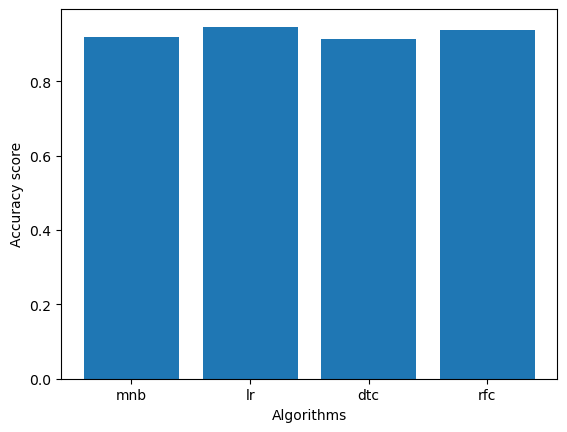

In [86]:
plt.bar(x=['mnb','lr','dtc','rfc'],height=[mnb_acc,lr_acc,dtc_acc,rfc_acc])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy score')
plt.show()